# Applied Machine learning in Python

Most of the computer science problems are solved by writing a series of instruction, but not at all the problems can be solved using this approach, for example a speech to text conversion system, there are millions to billions of words and it is a diffcult task to teach each adn every word and more over pronouncation,accent etc. differs, so for these type of problems the solution is to train the computer with an algorithm to understand some words so that it can learn by itself.This concept is called machine learning

Key types of machine learning problem
* Supervised : Learn to predict target values from labelled data
    * Classification (target values are discrete classes)
    * Regression (target values are continuous values)
* Unsupervised : Find structure in unlabelled data
    * Clustering : Find groups of similar instances in data
    * Outlier Detection : Finding usual patterns

In [1]:
%matplotlib notebook
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)
path = os.getcwd()
fruits = pd.read_table(path + r'\Dataset\fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
print('Predicted fruit type for ', example_fruit, ' is ', 
      target_names_fruits[knn.predict(example_fruit)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  orange


<IPython.core.display.Javascript object>


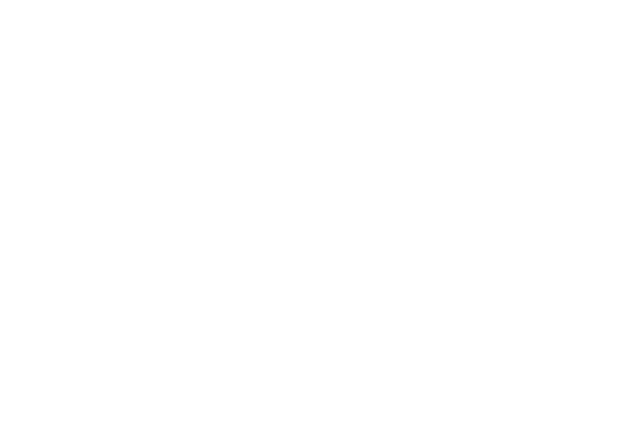

<IPython.core.display.Javascript object>


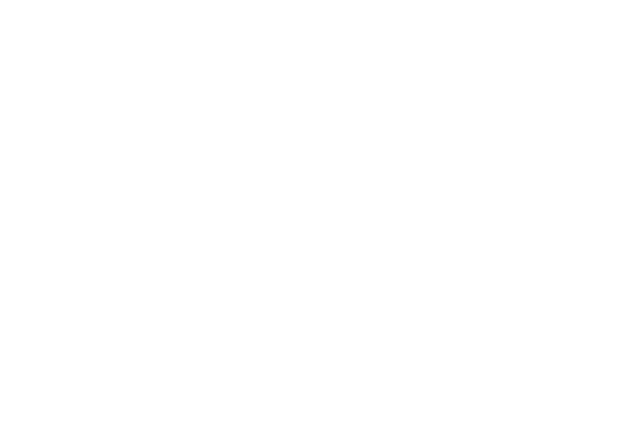

<IPython.core.display.Javascript object>


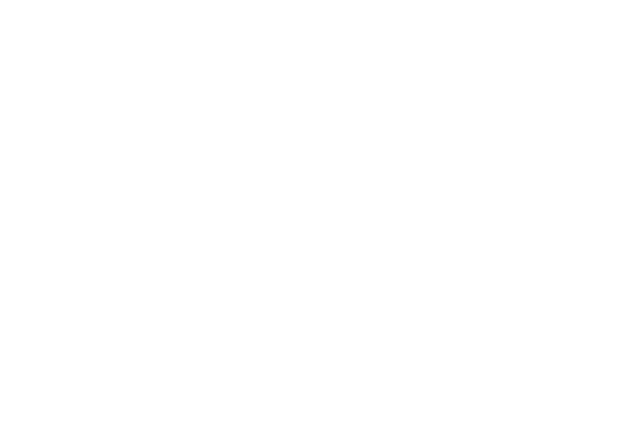

<IPython.core.display.Javascript object>


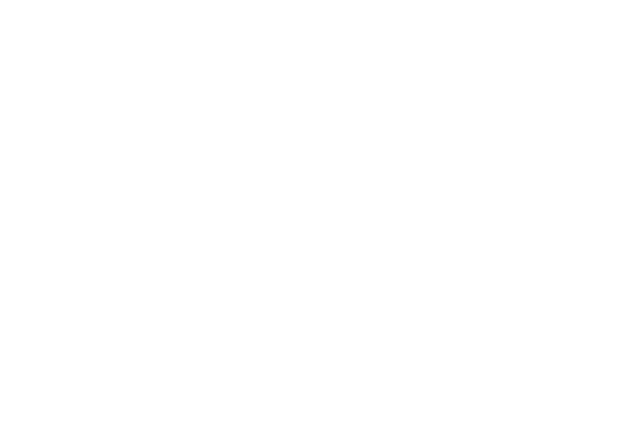

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table(path + r'\Dataset\fruit_data_with_colors.txt')

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [6]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In any machine learning task to train the computer we have split the data into two parts
* Training set
* Test set

Training set is used to train the model and test set is used to evaluate the learned model.

For creating a model all the features from the dataset might not be required so for that reason we take only those features which are revelant to the model we are creating.

### Creating train_test_split

In [7]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [9]:
y_train.head()

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

The first step in machine learning is to evaluating the dataset, for this any visualization method can be used or one can simply scrol through the data.The reason for evaluating the data is as follows,
* Type of cleaning or prep processing that is required
* Distribution of values for each feature


<IPython.core.display.Javascript object>


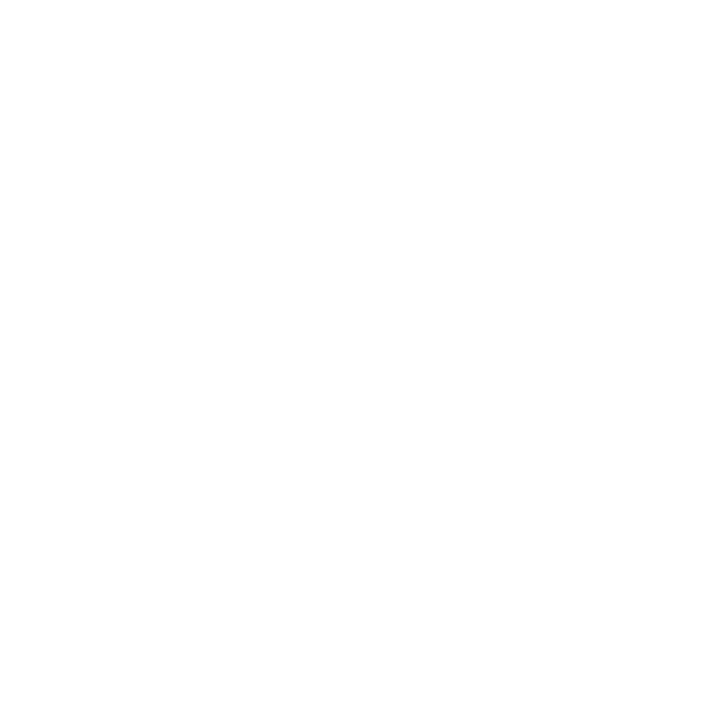

[]

In [10]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
plt.plot()

<IPython.core.display.Javascript object>


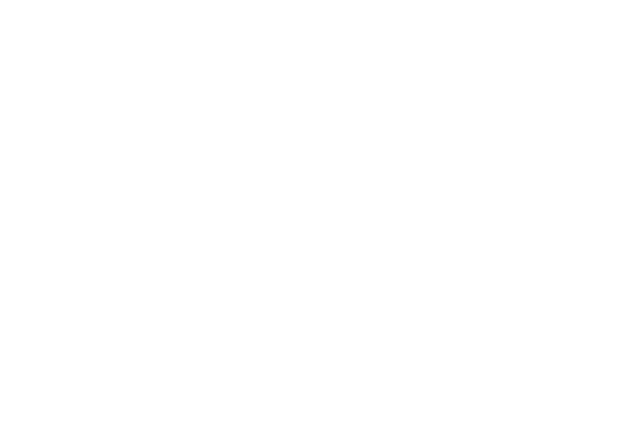

In [11]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [12]:
X_train.head()

,height,width,mass,color_score
42,7.2,7.2,154,0.82
48,10.1,7.3,174,0.72
7,4.0,5.8,76,0.81
14,7.3,7.6,152,0.69
32,7.0,7.2,164,0.80


In [13]:
y_train.head()

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

### Classification
* k-NN classifiers are an example of what's called instance based or memory based supervised learning. What this means is that instance based learning methods work by memorizing the labeled examples that they see in the training set. And then they use those memorized examples to classify new objects later.
* The k in k-NN refers to the number of nearest neighbors the classifier will retrieve and use in order to make its prediction. 
#### The k-Nearest Neighbor (k-NN) classifier algorithm
* FInd the most similar instances to X_test that are in X_train
* Get the labels of y_NN for the instances in X_NN
* predict the label by combining the labels y_NN
#### A nearest neighbor algorithm needs four things specified
1. A distance metric
2. How many nearest neighbors to look at?
3. Optional weighting function on the neighbor points
4. Method of aggregating the classes of neighbor points

### Create classifier object

In [14]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

#### Train the classifier (fit the estimator) using the training data

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Estimate the accuracy of the classifier on future data, using the test data

In [17]:
knn.score(X_train, y_train)

0.79545454545454541

In [18]:
knn.score(X_test, y_test)

0.53333333333333333

#### Use the trained k-NN classifier model to classify new, previously unseen objects

In [19]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [20]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

#### Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


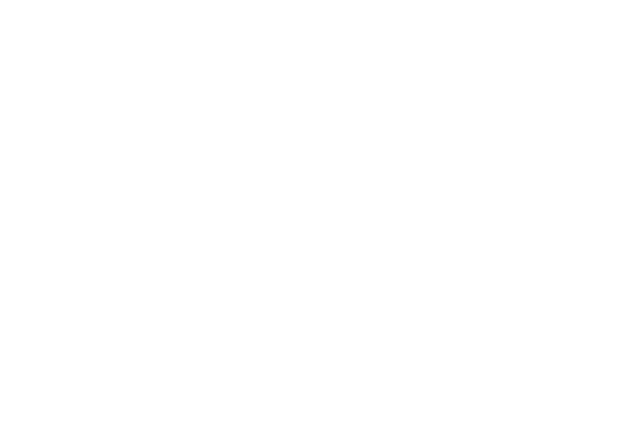

<IPython.core.display.Javascript object>


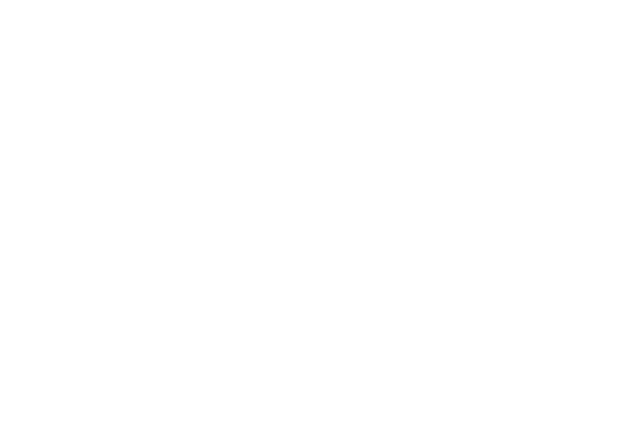

<IPython.core.display.Javascript object>


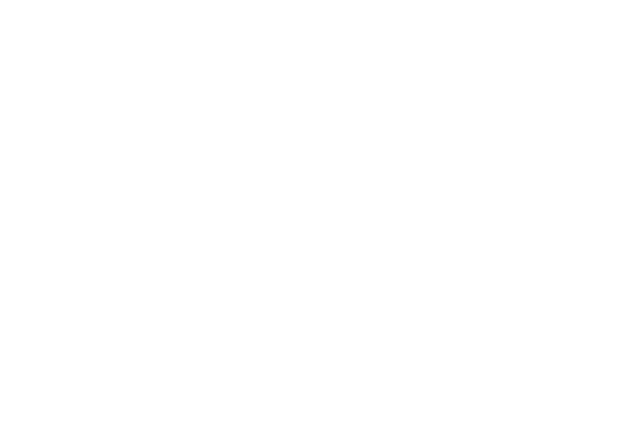

In [21]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 1, 'uniform')   # we choose 5 nearest neighbors
plot_fruit_knn(X_train, y_train, 5, 'uniform') 
plot_fruit_knn(X_train, y_train, 10, 'uniform')

#### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


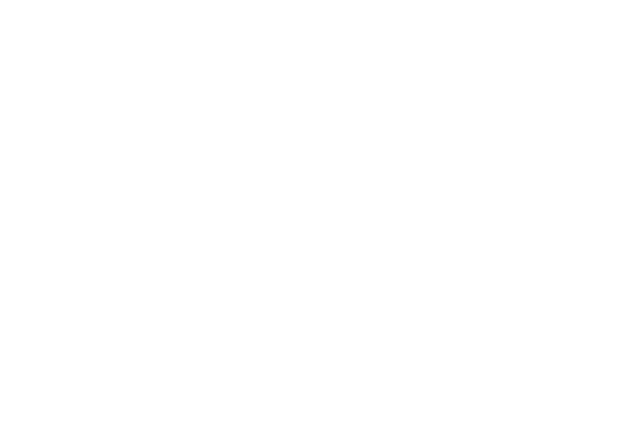

In [22]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
plt.show()

#### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


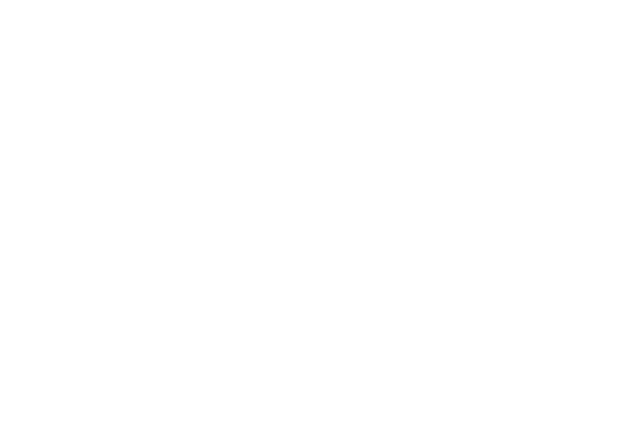

In [23]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
plt.show()

In [24]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

fruits = pd.read_table(path + r'\Dataset\fruit_data_with_colors.txt')

X = fruits[['height','width','mass','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train,y_test = train_test_split(X, y, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
print('Accuracy of knn classifier on the test set:', knn.score(X_test,y_test))

example_fruit = [[5.5,2.2,10,0.70]]
print('predicted fruit type for ', example_fruit, 'is ', knn.predict(example_fruit))


Accuracy of knn classifier on the test set: 0.533333333333
predicted fruit type for  [[5.5, 2.2, 10, 0.7]] is  [2]


Supervised learnign can be divided into two 
* Classification
* Regression

Both classification and regression take a set of training instances and learn a mapping to a target value.
* For classification, the target value is a discrete class value
        Ex: Binary: Deciding whether a transaction is fradulant or not
            Multiclass : Target value is one of a set of discrete values (the fruit dataset is a multi class)
            Multilabel : Example classifying pages into multiple topics
            
* For regression, the target value is continous (real-values/floating point)
        Ex: Predicting the selling prize of a house from it's attributes
    * Looking at the target value's type will guide you on what supervised learning method is to be use.
    * Many supervised learning methods have flavors for classification and Regression

#### Overfitting
Overfitting typically occurs when we try to fit a complex model with an inadequate amount of training data. An overfitted model uses its ability to capture complex patterns by being great at predicting lots and lots of specific data samples or areas of local variation in the training set. But it often misses seeing global patterns in the training set that would help it generalize well on the unseen test set. 

In general for a classifier as value of k decreases the risk of overfitting increases, this is because as k decresase say k = 1, now the classifier is affected by noise and outliers and there by decision boundary changes.

#### Underfitting
In case of under fitted model the learned model may not be even able to predict/classify the test vlaues.

#### Overfitting and Underfitting for Regression
In case of linear regresssion with an underfitted model the RSS (residual sum of saqures) is high and there by the predictions from the model will not be accurate, on the other hand in case of overfitted model that linear regression curve is of higher order with the intension of decresing the RSS but with this approach it tries to cover all the aspects but will not be able to generalize global pattern.
    
#### Overfitting and Underfitting for Classification
In case of knn classifier with an underfitted model the classification doesn't happen properly coz the model has not considered the majority of the points for classification but, on the other hand in case of overfitted model that knn boundary tries to classify considering all the points , but while doing so it may leave out the obvious global pattern i.e. in order to put a outlier point inside a particular group boundary the model would go on to extend the boundary which leads to undesired results.

<IPython.core.display.Javascript object>


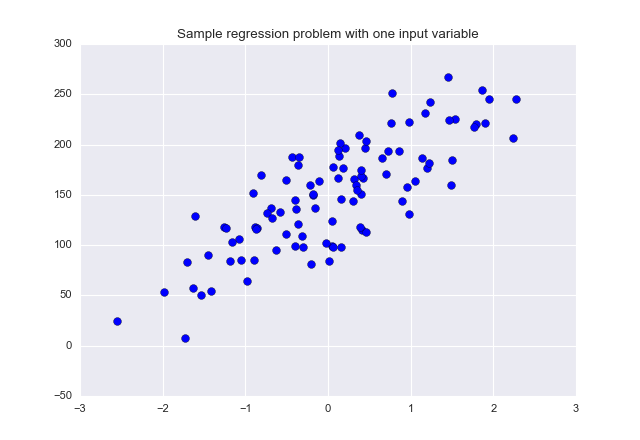

In [25]:
from sklearn.datasets import make_regression
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()

plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1,bias = 150.0, noise = 30, random_state = 0)

plt.scatter(X_R1, y_R1, marker = 'o', s= 50)
plt.show()

In [26]:
X_R1

array([[-0.36],
       [ 0.98],
       [ 0.4 ],
       [-0.81],
       [-0.89],
       [ 0.44],
       [-0.98],
       [ 0.43],
       [ 0.21],
       [-0.31],
       [-0.51],
       [ 0.13],
       [-1.54],
       [-0.4 ],
       [ 0.65],
       [ 1.18],
       [-0.18],
       [ 1.79],
       [ 1.45],
       [-0.68],
       [ 0.98],
       [ 1.9 ],
       [-0.44],
       [ 0.31],
       [ 0.76],
       [ 0.78],
       [ 1.95],
       [ 0.33],
       [-0.35],
       [ 1.53],
       [-0.9 ],
       [-0.58],
       [-1.05],
       [ 0.38],
       [ 0.01],
       [ 0.46],
       [ 0.14],
       [-0.4 ],
       [ 0.05],
       [-1.25],
       [ 1.05],
       [ 0.4 ],
       [-1.71],
       [ 2.24],
       [ 0.18],
       [-0.21],
       [ 1.23],
       [-0.85],
       [ 1.76],
       [ 0.41],
       [-0.91],
       [-1.42],
       [ 0.47],
       [ 0.9 ],
       [ 1.14],
       [ 0.4 ],
       [ 0.39],
       [-1.73],
       [ 1.47],
       [-0.19],
       [-0.87],
       [ 0.3 ],
       [

In [27]:
y_R1

array([ 120.61,  131.23,  150.56,  169.91,  118.16,  196.36,   63.87,
        166.52,  196.7 ,  109.35,  110.9 ,  167.15,   50.76,   99.06,
        186.67,  231.4 ,  149.87,  220.19,  267.55,  136.61,  222.41,
        221.7 ,  187.93,  165.96,  221.  ,  251.48,  245.1 ,  159.38,
        187.46,  225.78,   85.72,  133.32,   85.72,  209.37,   83.89,
        203.09,  201.83,  145.01,   99.18,  118.33,  163.73,  168.56,
         83.61,  206.67,  177.06,   81.58,  242.47,  117.24,  217.54,
        115.11,  151.73,   54.41,  112.72,  143.6 ,  186.77,  174.29,
        117.77,    8.01,  224.52,  150.69,  116.34,  143.89,  176.42,
         53.42,   24.22,   89.85,  102.12,   98.35,  181.29,  254.29,
        244.83,  131.6 ,   98.48,  184.41,  127.36,   57.58,  188.15,
        158.16,  160.22,  178.13,  193.31,  171.07,  137.31,  106.02,
        163.76,   98.45,  136.06,  193.64,  194.18,  164.32,  116.63,
        159.32,   95.27,  145.7 ,  123.87,  103.44,  179.35,  155.14,
        128.52,   83

* n_samples = 100 is the number of samples you want to generate
* n_features = 1 is the number of columns you want for your variable in the above case X_R1, as of now it has 1 column if 2 then 2 columns will be created
* n_informative = 1, The number of informative features, i.e., the number of features used to build the linear model used to generate the output.
* bias = 150.0, The bias term in the underlying linear model. [i think it is the difference between X_R1 and y_R1]
* noise = 30 The standard deviation of the gaussian noise applied to the output.
* random_state = 0 

<IPython.core.display.Javascript object>


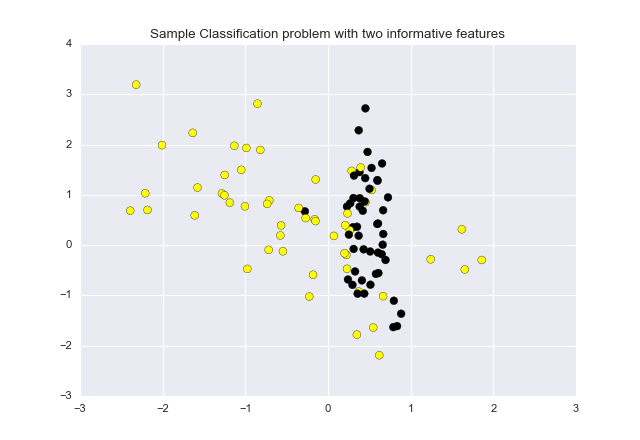

In [28]:
from sklearn.datasets import make_classification
plt.figure()

plt.title('Sample Classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2, 
                                 n_informative = 2, n_redundant = 0, 
                                 n_clusters_per_class = 1 , flip_y = 0.1, 
                                 class_sep = 0.5, random_state = 0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [29]:
X_C2#[: , 0]

array([[ 0.37, -0.92],
       [-0.16,  0.51],
       [-1.64,  2.23],
       [ 0.62, -2.19],
       [-0.99,  1.93],
       [-0.15,  1.31],
       [ 1.62,  0.31],
       [-2.01,  1.99],
       [ 0.51, -0.13],
       [ 0.41, -0.7 ],
       [ 0.53,  1.1 ],
       [ 0.6 ,  1.28],
       [ 0.45,  0.85],
       [-1.01,  0.77],
       [ 0.48,  1.85],
       [ 0.3 , -0.79],
       [ 0.33, -0.52],
       [ 0.6 , -0.15],
       [ 0.5 ,  1.12],
       [ 0.61,  0.43],
       [-1.28,  1.03],
       [ 0.31,  0.94],
       [ 0.38,  1.45],
       [ 0.36, -0.97],
       [ 0.3 ,  0.36],
       [ 0.65, -0.18],
       [-0.15,  0.48],
       [ 0.45,  1.33],
       [ 0.29,  1.48],
       [ 0.44, -0.96],
       [-0.28,  0.67],
       [ 0.73,  0.95],
       [ 0.44,  0.87],
       [ 0.66,  0.01],
       [ 0.55, -1.64],
       [-0.98, -0.47],
       [-0.71,  0.89],
       [-1.13,  1.98],
       [ 0.67,  0.22],
       [ 0.35, -1.78],
       [-1.61,  0.59],
       [-0.72, -0.09],
       [-0.23, -1.02],
       [ 1.

In [30]:
y_C2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0])

In [31]:
print(len(X_C2),len(y_C2))

100 100


<IPython.core.display.Javascript object>


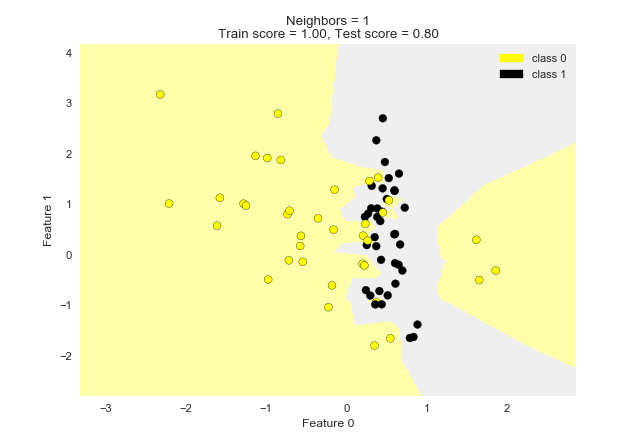

<IPython.core.display.Javascript object>


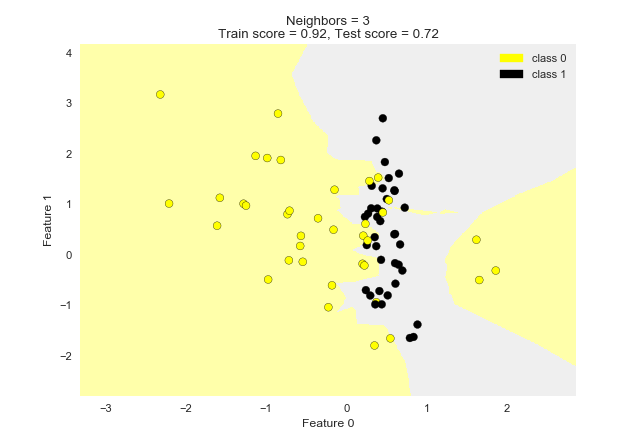

<IPython.core.display.Javascript object>


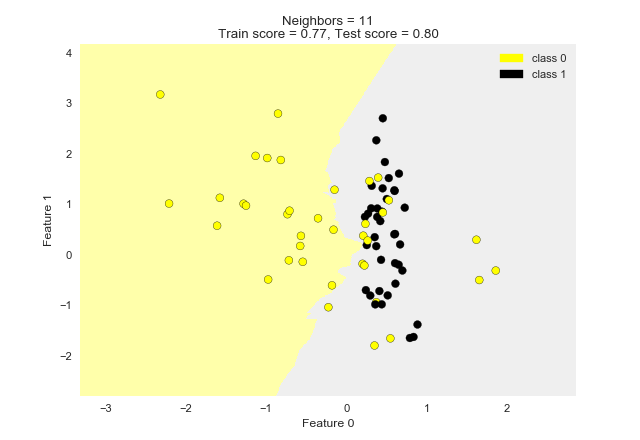

In [32]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

In case of figure 3 where k=1 the classifier is doing overfitting by considering each and every point and it can also be observed that for k=1 the train score = 1 and test score = 0.8.

Now as k incereases to 3 i.e. k=3, training score decreases and test score decreases marginally.
i.e. train score = 0.92 and test score = 0.72

Again for k=11 training score has further decreased to 0.77 while the test score increases to 0.8, the other important thing to observe here is the more generalized patter that has come in terms of boundary. which menas the model is able to see the more generalized pattern.


#### Knn can also be used to for regression models.
In this case the depending on the k value the model will consider those many nearest points to the query point and then take the average of all these points to predict the target value,In case of a knn regresser also as the value of k decreases the risk of overfitting increases and as the value of increases the model tries to understand the more global pattern.

#### R-Squared regression score [Co-efiicient of determination]
Measure how well a prediction model for regression fits the given data. The score is between 0 to 1.
* A value of 0 corresponds to a constant model that predicts the mean value of all training target values.
* A value of 1 corresponds to prefect prediction

In [33]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 231.71  148.36  150.59  150.59   72.15  166.51  141.91  235.57  208.26
  102.1   191.32  134.5   228.32  148.36  159.17  113.47  144.04  199.23
  143.19  166.51  231.71  208.26  128.02  123.14  141.91]
R-squared test score: 0.425


<IPython.core.display.Javascript object>


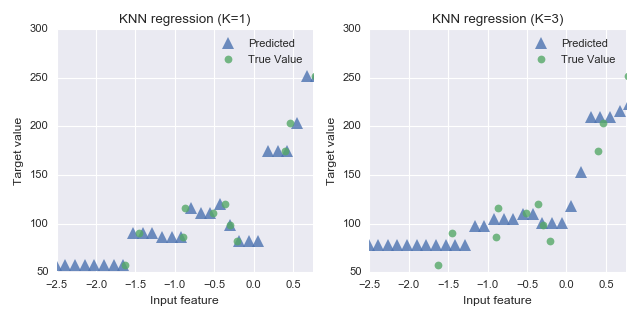

In [34]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


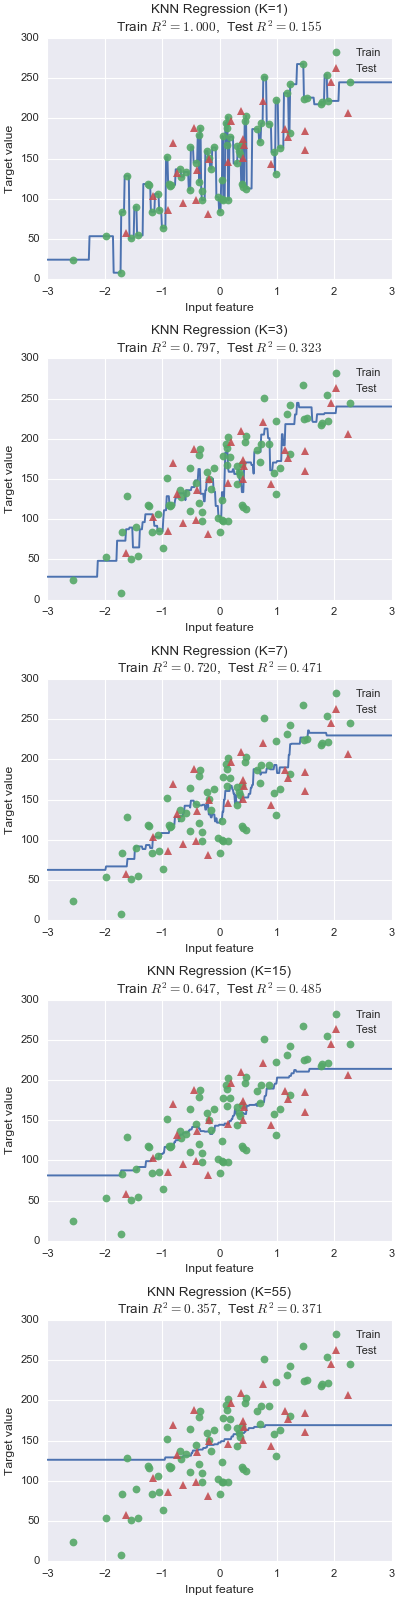

In [35]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


As the value of k increases (till optimum) the Test R^2  increases and train R^2 decreases as shown in above 4 figure with values of k 1, 7, 15, 55. Till k=15 the preformance of the model was increasing but at k=55 the model is underfitting i.e it is not able to work even on the training data.

Advantages of Knn are:
* Simple and easy approach
* knn approch can be reasonable baseline for comparison against more sophisticated methods

Cons for knnn are
* If the number of feature are more the performance of the k decreases
* In the dataset that has sparse data (many columns are there but with majority of the data as 0)

K-nearest neighbors and linear model fitting using least squares are two complementary approaches to supervised learning. K-nearest neighbors doesn't make a lot of assumptions about the structure of the data and gives potentially accurate but sometimes unstable predictions here unstable means that it could be sensitive to small changes in the training data. 

On the other hand, linear models make strong assumptions about the structure of the data. In other words, that the target value can be predicted just using a weighted sum of the input variables, a linear function.

In [36]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/Vp67vQM.png'))

<IPython.core.display.Image object>

As it can be seen from the above figure initially the model accuracy increase with increase in model complexity but after certain point it stats decreasing and coz with increase in complexity[no of features] and with same value or lesser value of k the model tries to overfit resulting in reduction of the accuracy.

What is a model?

It's a specific mathematical or computational description that expresses the relationship between a set of input variables and one or more outcome variables that are being studied or predicted. 

In statistical terms, the input variables are called independent variables. And the outcome variables are termed dependent variables. 

In machine learning, we use the term features to refer to the input or independent variables, and target value or target label to refer to the output dependent variable.

#### Linear Models 

A linear model is a sum of weighted variables that predicts a target output value given an input data instance.

Linear models make a strong prior assumption about the relationship between the input x and output y. Linear models may seem simplistic. But for data with many features, linear models can be very effective and generalize well to new data beyond the training set. 

In [37]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/F7Yi6uw.png'))

<IPython.core.display.Image object>

In [38]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


<IPython.core.display.Javascript object>


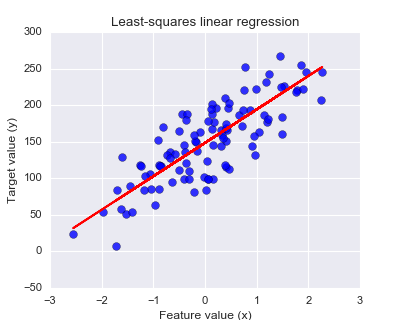

In [39]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Ridge regression

* Ridge regression learns w, busing the same least-squares criterion but adds a penalty for large variations in w parameters

In [40]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/frZG9pZ.png'))

<IPython.core.display.Image object>

* Once the parameters are learned, the ridge regression prediction formula is the sameas ordinary least-squares.
* The addition of a parameter penalty is called regularization. Regularization prevents overfitting by restricting the model, typically to reduce its complexity.
* Ridge regression uses L2 regularization: minimize sum of squares of w-entries
* The influence of the regularization term is controlled by the 𝛼 parameter.
* Higher alpha means more regularization and simpler models
* The regularization term prevents overfitting becasue it is adding to the RHS i.e. to sum of squares.

In [41]:
from adspy_shared_utilities import load_crime_dataset
(X_crime, y_crime) = load_crime_dataset()
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.4230358463515
ridge regression linear model coeff:
[  1.95e-03   2.19e+01   9.56e+00  -3.59e+01   6.36e+00  -1.97e+01
  -2.81e-03   1.66e+00  -6.61e-03  -6.95e+00   1.72e+01  -5.63e+00
   8.84e+00   6.79e-01  -7.34e+00   6.70e-03   9.79e-04   5.01e-03
  -4.90e+00  -1.79e+01   9.18e+00  -1.24e+00   1.22e+00   1.03e+01
  -3.78e+00  -3.73e+00   4.75e+00   8.43e+00   3.09e+01   1.19e+01
  -2.05e+00  -3.82e+01   1.85e+01   1.53e+00  -2.20e+01   2.46e+00
   3.29e-01   4.02e+00  -1.13e+01  -4.70e-03   4.27e+01  -1.23e-03
   1.41e+00   9.35e-01  -3.00e+00   1.12e+00  -1.82e+01  -1.55e+01
   2.42e+01  -1.32e+01  -4.20e-01  -3.60e+01   1.30e+01  -2.81e+01
   4.39e+01   3.87e+01  -6.46e+01  -1.64e+01   2.90e+01   4.15e+00
   5.34e+01   1.99e-02  -5.47e-01   1.24e+01   1.04e+01  -1.57e+00
   3.16e+00   8.78e+00  -2.95e+01  -2.33e-04   3.14e-04  -4.14e-04
  -1.80e-04  -5.74e-01  -5.18e-01  -4.21e-01   1.53e-01   1.33e+00
   3.85e+00   3.0

### Need for Feature Normalization

* Important for some machine learning methods that all features are on the same scale (e.g. faster convergence in learning, more uniform or 'fair' influence for all weights)
        e.g. regularized regression, k-NN, support vector machines, neural networks
* One method of establishing the feature normalization is to use minmax scaler function, this method normalises all the feature to lie between 0 and 1, with 1 for max value in column and 0 for min value. With this approach all the features have equal weightage.
* For each feature 𝑥𝑖: compute the min value 𝑥𝑖𝑀in and the max value 𝑥i𝑀ax achieved across all instances in the training set.
* For each feature: transform a given feature 𝑥𝑖 value to a scaled version 𝑥𝑖′using the formula
        xi' = (xi - xmin)/(ximax - ximin)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)

In the above code fit and transform are used differently, however it can be used as one as shown below

scaler = MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)

* The test set must use identical scaling to the training set but without the use of fit.
    fit_transform should be used on training set data and only transform should be used on test set to avoid data leakage.
    
#### Disadvantage of doing feature Normalization.

The resulting model and the transformed features may be harder to interpret. 


In general, regularisation works especially well when you have relatively small amounts of training data compared to the number of features in your model. Regularisation becomes less important as the amount of training data you have increases.


#### Ridge regression with regularization parameter: alpha

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



C:\Users\kkv1\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.734371679487529e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


From the above values of alpha it can be seen that initially the r-squared test value increases with increase in alpha but later it starts to decrease with further increase in alpha.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
    
print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044145
ridge regression linear model coeff:
[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


#### Lasso Regression

Lasso regression is another form of regularized linear regression that uses an L1 regularization penalty for training.

In [44]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/CQTQz0E.png'))

<IPython.core.display.Image object>

* This has the effect of setting parameter weights to zero for the least influential variables. This is called a sparsesolution: a kind of feature selection
* The parameter 𝛼 controls amount of L1 regularization (default = 1.0).
* The prediction formula is the same as ordinary least-squares.
* When to use ridge vs lasso regression:
        – Many small/medium sized effects: use ridge.
        – Only a few variables with medium/large effect: use lasso.

In [45]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985809
lasso regression linear model coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624

Features with 

#### Lasso regression with regularization parameter: alpha

In [46]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



From the above output it can also be oberseved that as alpha increases the number of features with non zero weightage decreases, i.e with increase in alpha the more and more coefficient are set to zero in case of a Lasso regression

#### Polynomial regression 

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_friedman1

X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)
print(X_F1)
print('X_F1 is ',len(X_F1))
print('y_F1 is ',len(y_F1))
print('X_F1_poly is ',len(X_F1_poly))
print('y_F1 is ',len(y_F1))
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [  4.42   6.     0.53  10.24   6.55  -2.02  -0.32]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

[[ 0.55  0.72  0.6   0.54  0.42  0.65  0.44]
 [ 0.89  0.96  0.38  0.79  0.53  0.57  0.93]
 [ 0.07  0.09  0.02  0.83  0.78  0.87  0.98]
 [ 0.8   0.46  0.78  0.12  0.64  0.14  0.94]
 [ 0.52  0.41  0.26  0.77  0.46  0.57  0.02]
 [ 0.62  0.61  0.62  0.94  0.68  0.36  0.44]
 [ 0.7   0.06  0.67  0.67  0.21  0.13  0.32]
 [ 0.36  0.57  0.44  0.99  0.1   0.21  0.16]
 [ 0.65  0.25  0.47  0.24  0.16  0.11  0.66]
 [ 0.14  0.2   0.37  0.82  0.1   0.84  0.1 ]
 [ 0.98  0.47  0.98  0.6   0.74  0.04  0.28]
 [ 0.12  0.3   0.12  0.32  0.41  0.06  0.69]
 [ 0.57  0.27  0.52  0.09  0.58  0.93  0.32]
 [ 0.67  0.13  0.72  0.29  0.18  0.59  0.02]
 [ 0.83  0.    0.68  0.27  0.74  0.96  0.25]
 [ 0.58  0.59  0.57  0.22  0.95  0.45  0.85]
 [ 0.7   0

#### Logistic Regression

In [48]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/R2Q9y3x.png'))

<IPython.core.display.Image object>

In [49]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/ukI8vRB.png'))

<IPython.core.display.Image object>

<IPython.core.display.Javascript object>


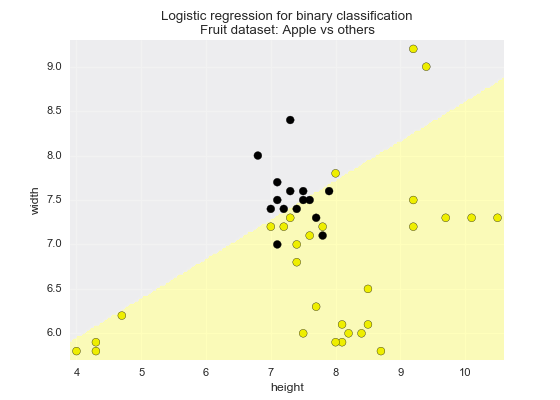

[True]
A fruit with height 6 and width 8 is predicted to be: an apple
[False]
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.73


In [50]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print([clf.predict([[h,w]])[0]])
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print([clf.predict([[h,w]])[0]])
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

<IPython.core.display.Javascript object>


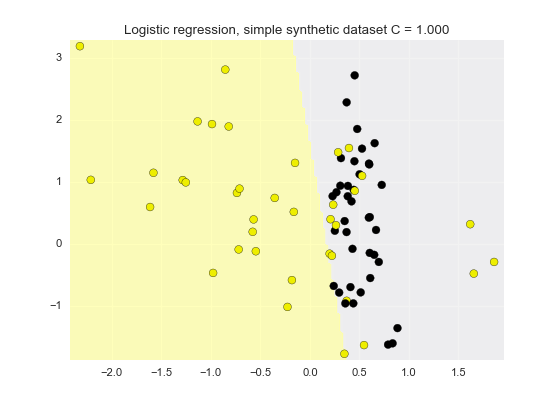

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.80


In [51]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     

<IPython.core.display.Javascript object>


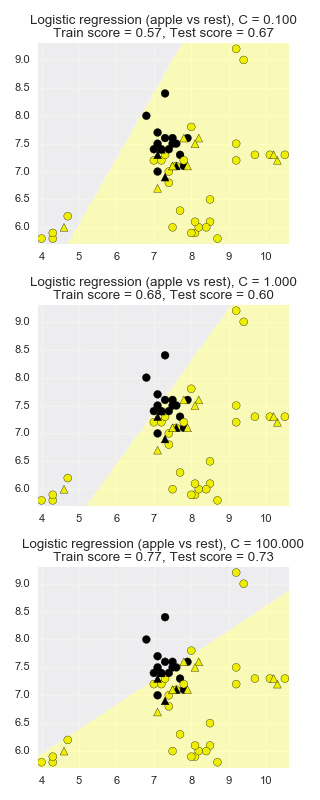

In [52]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

In [53]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


### Linear classifiers


A linear classifier is a function that maps an input data point x to an output class value y(+1 or -1) using a linear function with weight parameters w of the input point's features

In [54]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/FLeOLwW.png'))

<IPython.core.display.Image object>

In the above equation wi is weightage of the cofficeient and xi is the value for the points. Dot product of this is computed as show in the firgure

If w1 and w2 are coefficients and x1 and x2 are the points and if b=0, then,

Dot product

(w1,w2)o(x1,x2)

(w1 x1) + (w2 x2)

If the above case the line considered is x1- x2 = 0 and there by w1 and w2 are 1 and -1 respectively
so on considering any point in the plain we just need to substitute the value of x1 and x2 to find out whether resultant value is greater than or less than zero.

If the value is greater than 0 then it is considered as belonging to class +1 else to class -1.This classification is done by the sign in the above formula.

### Classifier Margin

Defined as the maximum width the decision boundary area can be increased before hitting a data point.

In [55]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/MtG29Jl.png'))

<IPython.core.display.Image object>

### Support Vector Machines
#### Linear Support Vector Machine

<IPython.core.display.Javascript object>


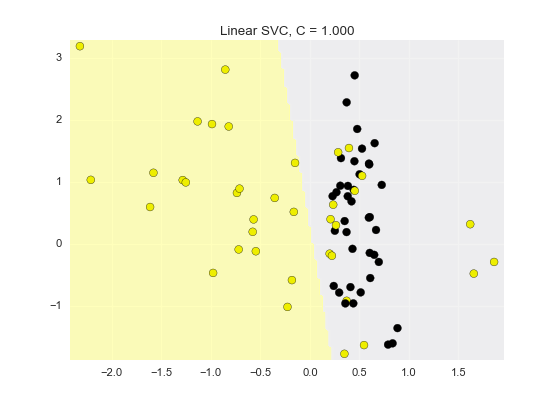

In [56]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Linear Support Vector Machine: C parameter

<IPython.core.display.Javascript object>


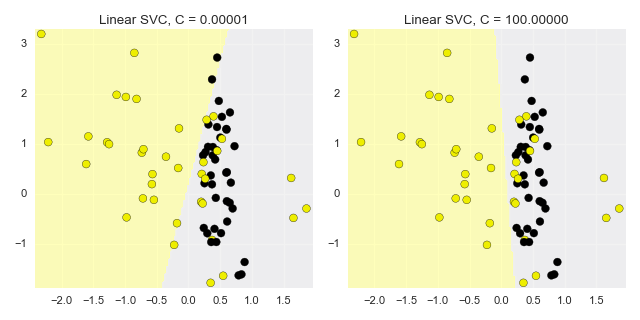

In [57]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

##### The strength of regularization is determined by C
* Larger values of C: less regularization
        –Fit the training data as well as possible
        –Each individual data point is important to classify correctly
* Smaller values of C: more regularization
        –More tolerant of errors on individual data points

#### Application to real dataset

In [58]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.87
Accuracy of Linear SVC classifier on test set: 0.86


### Multi-Class Classification

In [59]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/FFArikL.png'))

<IPython.core.display.Image object>

* scikit-learn automatically detects a multiclass classification problem.
* scikit-learn makes it very easy to learn multiclass classification models by converting a multiclass classification problem into a series of binary problems.
*  Scikit-learn creates one binary classifier that predicts that class against all the other classes.
            example: In the fruit dataset there are four categories of fruit. So scikit-learn learns four different binary classifiers.
* To predict a new data instance, it takes data instance whose labels to be predict, and runs it against each of the binary classifiers in turn, and the classifier that has the highest score is the category to which this instance of data belongs to.

#### LinearSVC with M classes generates M one vs rest classifiers.

In [60]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.23  0.72]
 [-1.63  1.15]
 [ 0.08  0.31]
 [ 1.26 -1.68]]
Intercepts:
 [-3.32  1.2  -2.75  1.16]


#### Multi-class results on the fruit dataset

<IPython.core.display.Javascript object>


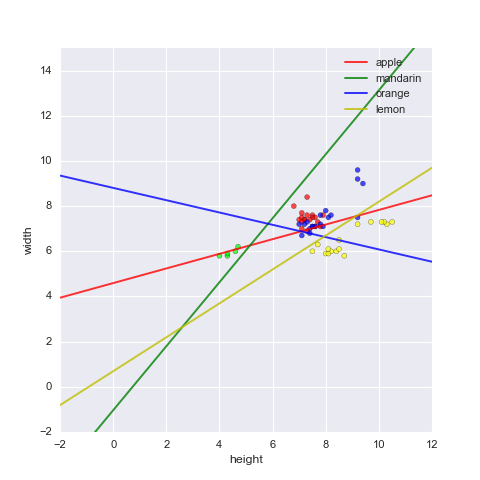

In [61]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

#### KernelizedSupport Vector Machines

#### Classification

For a linear support vector machine it is not possible to classify all the points based on a linear boundry. In such cases we can make use of kernelized SVM's.

In this approach the original feaure space is converted to a higher dimensional feature space and a pattern is obtained from that and then again brought back to the original feature.

The below series of figure is an example for one dimensional space being projected to two dimension.

In [62]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/Gza9R3e.png'))

<IPython.core.display.Image object>

In [63]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/0bXzbCh.png'))

<IPython.core.display.Image object>

In [64]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/U68BVpQ.png'))

<IPython.core.display.Image object>

In [65]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/M0TqFWU.png'))

<IPython.core.display.Image object>

The above transformation is obtained by taking y co-ordinate as square of x co-ordinate.
        * vi=(𝑥𝑖,𝑥𝑖^2)  i.e. (x1,x1^2),(x2,x2^2),(x3,x3^2)

Similarly on the transformation of 2d to 3d is done using 
        * vi=(𝑥0,𝑥1,1−(𝑥0^2+𝑥1^2))

In [66]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/rbw2t4T.png'))

<IPython.core.display.Image object>

In [67]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/hAPlI7n.png'))

<IPython.core.display.Image object>

<IPython.core.display.Javascript object>


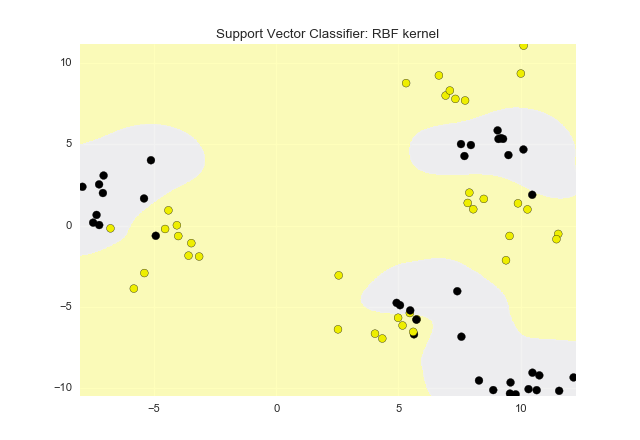

<IPython.core.display.Javascript object>


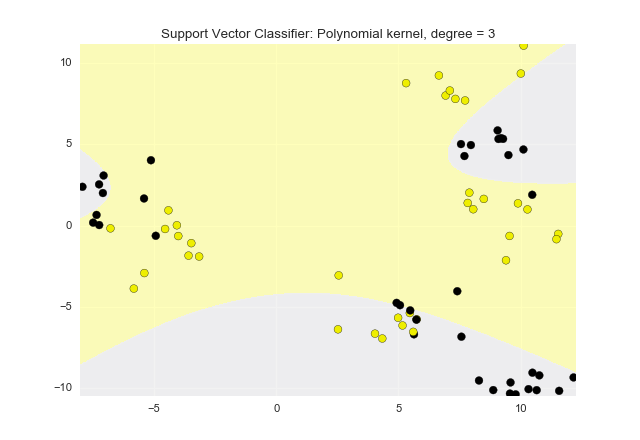

In [68]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

* In the figure Support Vector Classifier with RBF kernel it can see that unlike a linear classifier, the SVM with RBF kernel finds a more complex and very effective set of decision boundaries that are very good at separating one class from the other.
* Note that the SVM classifier is still using a maximum margin principle to find these decision boundaries. But because of the non-linear transformation of the data, these boundaries may no longer always be equally distant from the margin edge points in the original input space.
* SVC is a part of svm and by default assumes the kernel to be Radial Basis Function [RBF] but there are options to change the kernel to say poly. IF poly kernel is considered then degree of the polynomial also should be considered.

#### Support Vector Machine with RBF kernel: gamma parameter

<IPython.core.display.Javascript object>


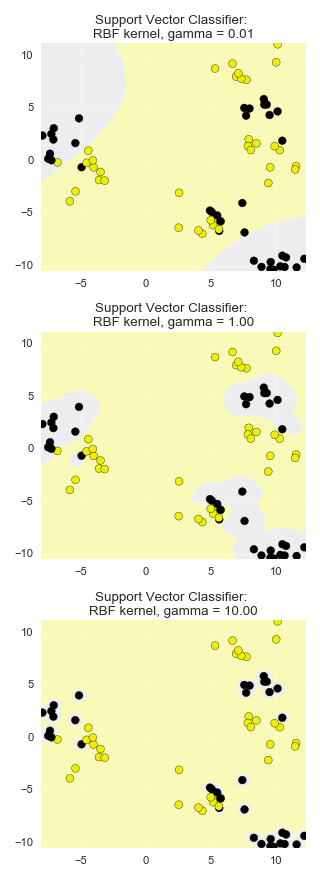

In [69]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

From the above figures it can be seen that as gamma increases the model tries to overfit.
* Gamma controls how far the influence of a single trending example reaches, which in turn affects how tightly the decision boundaries end up surrounding points in the input space.
* Small gamma means a larger similarity radius. So that points farther apart are considered similar. Which results in more points being group together and smoother decision boundaries.
* On the other hand for larger values of gamma, the kernel value to K is more quickly and points have to be very close to be considered similar. This results in more complex, tightly constrained decision boundaries.
* Small values of gamma give broader, smoother decision regions. While larger values of gamma give smaller, more complex decision regions.

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

<IPython.core.display.Javascript object>


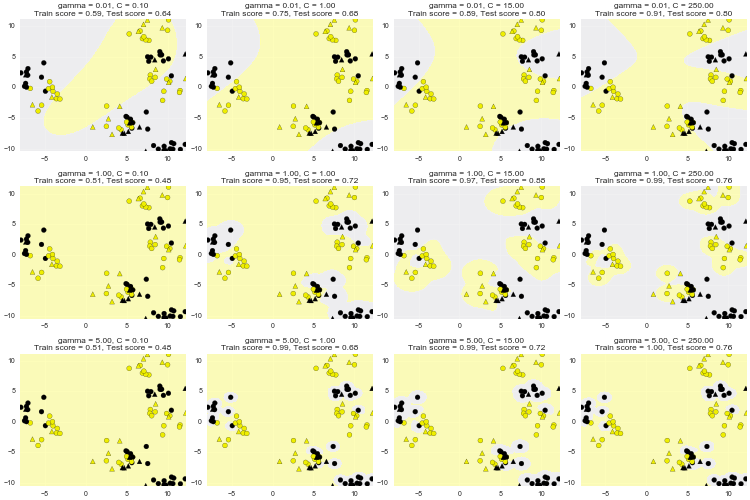

In [70]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

* SVMs also have a regularization parameter, C, that controls the tradeoff between satisfying the maximum margin criterion to find the simple decision boundary, and avoiding misclassification errors on the training set. The C parameter is also an important one for kernelized SVMs, and it interacts with the gamma parameter.
* If gamma is large, then C will have little to no effect. Well, if gamma is small, the model is much more constrained and the effective C will be similar to how it would affect a linear classifier.
* Typically, gamma and C are tuned together, with the optimal combination typically in an intermediate range of values. For example, gamma between 0.0001 and 10 and see between 0.1 and 100. Though the specifical optimal values will depend on your application. 

##### Application of SVMs to a real dataset: unnormalized data

In [71]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


* We can see the results with training set accuracy of 1.00 and the test set accuracy of 0.63 that show that the support vector machine is over fitting. It's doing well on the training data, but very poorly on the test data. 

### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.98
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


* After the scaler has been applied, all the input features now lie in the same range zero to one.And looking at these new results, the tests set accuracy is much, much higher, 96%. This illustrates what a huge difference normalizing the features of the training data can have on SVM performance.

## Cross-validation

* Uses multiple train-test splits, not just a single one
* Each split used to train & evaluate a separate model

##### Why is this better?
* The accuracy score of a supervised learning method can vary, depending on which samples happen to end up in the training set.
* Using multiple train-test splits gives more stable and reliable estimates for how the classifier is likely to perform on average.
* Results are averaged over multiple different training sets instead of relying on a single model trained on a particular training set.

In [73]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/jZK7jzX.png'))

<IPython.core.display.Image object>

If a data set is sorted or classified then all the observation belonging to a single class are present at one place and if the sklearn takes the values from this sorted data set then training model or test model may not have one or more type of data, so inorder to avoid this stratified cross validation is used. 

"Stratified folds each contain a proportion of classes that matches the overall dataset. Now, all classes will be fairly represented in the test set."

### Example based on k-NN classifier with fruit dataset (2 features)

In [74]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [ 0.77  0.74  0.83]
Mean cross-validation score (3-fold): 0.781


### A note on performing cross-validation for more advanced scenarios.

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course).  Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately.  To do this, the easiest way in scikit-learn is to use *pipelines*.  While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media).

In [75]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/PKhWKhV.png'))

<IPython.core.display.Image object>

This type of cross validation is particularly used when the dataset is small. The inherent advantage of this validation is the high number of observations available for the training.

## Validation curve example

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [77]:
print(train_scores)

[[ 0.49  0.42  0.41]
 [ 0.84  0.72  0.76]
 [ 0.92  0.9   0.93]
 [ 1.    1.    0.98]]


In [78]:
print(test_scores)

[[ 0.45  0.32  0.33]
 [ 0.82  0.68  0.61]
 [ 0.41  0.84  0.67]
 [ 0.36  0.21  0.39]]


In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)
print(train_scores)
print(test_scores)

[[ 0.49  0.42  0.41]
 [ 0.84  0.72  0.76]
 [ 0.92  0.9   0.93]
 [ 1.    1.    0.98]]
[[ 0.45  0.32  0.33]
 [ 0.82  0.68  0.61]
 [ 0.41  0.84  0.67]
 [ 0.36  0.21  0.39]]


<IPython.core.display.Javascript object>


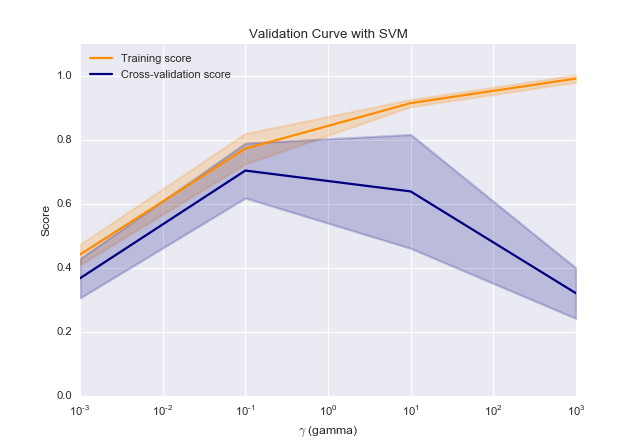

In [80]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
#print(train_scores_mean)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

#### Another example of validation curve 

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv(path + r'\Dataset\mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

In [82]:
param_range = np.logspace(-4,1,6)
train_scores, test_scores = validation_curve(SVC(), X_train2, y_train2,
                                            param_name='gamma',
                                            param_range= param_range, cv=3)
#res1 = np.mean(train_scores,axis = 1)
#std1 = np.std(train_scores, axis=1)
#res2 = np.mean(test_scores,axis = 1)
#std2= np.std(test_scores,axis = 1)

print(train_scores)
print(test_scores)

[[ 0.89  0.89  0.89]
 [ 0.98  0.97  0.97]
 [ 1.    1.    1.  ]
 [ 1.    1.    1.  ]
 [ 1.    1.    1.  ]
 [ 1.    1.    1.  ]]
[[ 0.89  0.9   0.88]
 [ 0.97  0.97  0.98]
 [ 1.    1.    0.99]
 [ 1.    1.    1.  ]
 [ 1.    1.    1.  ]
 [ 0.52  0.52  0.52]]


<IPython.core.display.Javascript object>


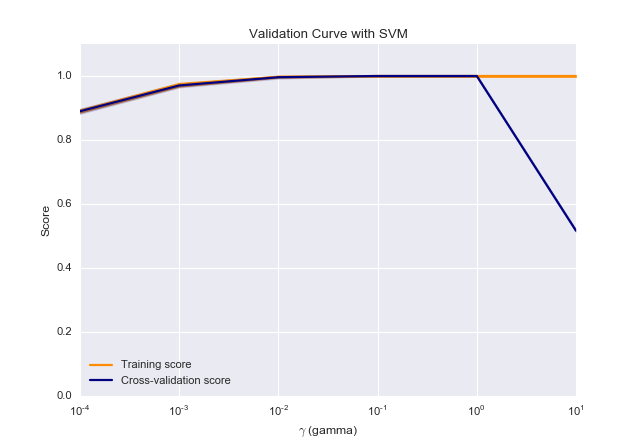

In [83]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
#print(train_scores_mean)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.8,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [84]:
clf = SVC(kernel = 'rbf',C=1,random_state = 0,gamma= 0.0001).fit(X_train2, y_train2)
train_score1 = clf.score(X_train2, y_train2)
test_score1 = clf.score(X_test2, y_test2)
print(train_score1,test_score1)

clf = SVC(kernel = 'rbf',C=1,random_state = 0,gamma= 0.001).fit(X_train2, y_train2)
train_score2 = clf.score(X_train2, y_train2)
test_score2 = clf.score(X_test2, y_test2)
print(train_score2,test_score2)

clf = SVC(kernel = 'rbf',C=1,random_state = 0,gamma= 0.01).fit(X_train2, y_train2)
train_score3 = clf.score(X_train2, y_train2)
test_score3 = clf.score(X_test2, y_test2)
print(train_score3,test_score3)

clf = SVC(kernel = 'rbf',C=1,random_state = 0,gamma= 0.1).fit(X_train2, y_train2)
train_score4 = clf.score(X_train2, y_train2)
test_score4 = clf.score(X_test2, y_test2)
print(train_score4,test_score4)

clf = SVC(kernel = 'rbf',C=1,random_state = 0,gamma= 1.0).fit(X_train2, y_train2)
train_score5 = clf.score(X_train2, y_train2)
test_score5 = clf.score(X_test2, y_test2)
print(train_score5,test_score5)

clf = SVC(kernel = 'rbf',C=1,random_state = 0,gamma= 10.0).fit(X_train2, y_train2)
train_score6 = clf.score(X_train2, y_train2)
test_score6 = clf.score(X_test2, y_test2)
print(train_score6,test_score6)

0.893320203512 0.895617922206
0.977515181356 0.979812900049
0.998687017889 1.0
1.0 1.0
1.0 1.0
1.0 0.522402757262


In [85]:
train_scores_mean = np.mean([train_score1,train_score2,train_score3,train_score4,train_score5,train_score6])
test_scores_mean = np.mean([test_score1,test_score2,test_score3,test_score4,test_score5,test_score6])
train_scores_mean

0.97825373379287706

### Decision Trees

* Decision trees can be used for both classification and regression.
* The goal when building a decision tree is to find the sequence of questions that has the best accuracy at classifying the data in the fewest steps. Looking at a decision tree, each decision splits the data into two branches based on some feature value being above or below a threshold. 
* An important concept is how informative a split of the data is. So intuitively an informative split of the data is one that does an excellent job at separating one class from the others.
* There are a number of mathematical ways to compute the best split. One criterion that's widely used for decision trees is called information game, for example. So to build the decision tree, the decision tree building algorithm starts by finding the feature that leads to the most informative split. 
* Trees whose leaf nodes each have all the same target value are called pure, as opposed to mixed where the leaf nodes are allowed to contain at least some mixture of the classes. 
* To predict the class of a new instance given its feature measurements, using the decision tree we simply start at the root of the decision tree and take the decision at each level based on the appropriate feature measurement until we get to a leafnode.
* Decision trees can also be used for regression using the same process of testing the future values at each node and predicting the target value based on the contents of the leafnode. For regression, the leafnode prediction would be the mean value of the target values for the training points in that leaf.
* problem with building decision trees in general that keep adding rules until the leafnodes are pure. Typically such trees are overly complex and essentially memorized the training data.

In [86]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


#### Pre-pruning and post pruning
* One strategy to prevent overfitting is to prevent the tree from becoming really detailed and complex by stopping its growth early. This is called pre-pruning. Another strategy is to build a complete tree with pure leaves but then to prune back the tree into a simpler form. This is called post-pruning or sometimes just pruning.
* The decision tree implementation and scikit-learn only implements pre-pruning.
* We can control tree complexity via pruning by limiting either the maximum depth of the tree using the max depth parameter or the maximum number of leafnodes using the max leafnodes parameter. We could also set a threshold on the minimum number of instances that must be in a node to consider splitting it.

In [87]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/CleujvU.png'))
# slide no 118 in the PDF

<IPython.core.display.Image object>

#### Setting max decision tree depth to help avoid overfitting

In [88]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


#### Visualizing decision trees

from adspy_shared_utilities import plot_decision_tree
plot_decision_tree(clf, iris.feature_names, iris.target_names)

* One great advantage of decision trees at least for the not too big, is that they're easy to interpret. 

#### Feature Importance

* A number between 0 and 1 assigned to each feature.
* Feature importance of 0 ==> the feature was not used in prediction.
* Feature importance of 1 ==> the feature predicts the target perfectly.
* All feature importancesare normalized to sum to 1.
* Note that if a feature has a low feature importance value, that doesn't necessarily mean that the feature is not important for prediction. It simply means that the particular feature wasn't chosen at an early level of the tree and this could be because the future may be identical or highly correlated with another informative feature and so doesn't provide any new additional signal for prediction.

C:\Users\kkv1\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


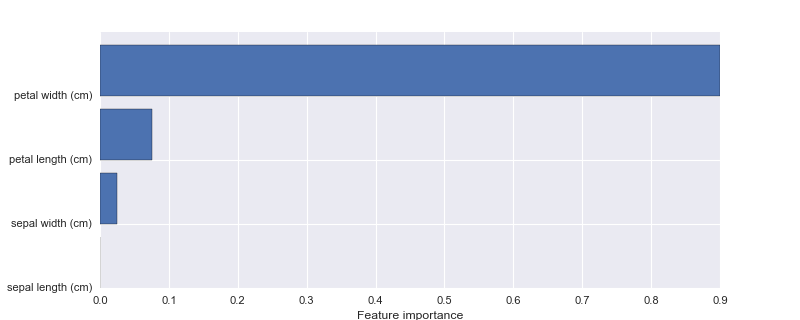

Feature importances: [ 0.    0.02  0.08  0.9 ]


In [89]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

* Feature importance can vary depending on the specific model learned for a particular train/test split for example. It's common when computing feature importance to use an average over multiple train/test splits. 

#### Decision Trees on a real-world dataset

In [90]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

#plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


C:\Users\kkv1\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


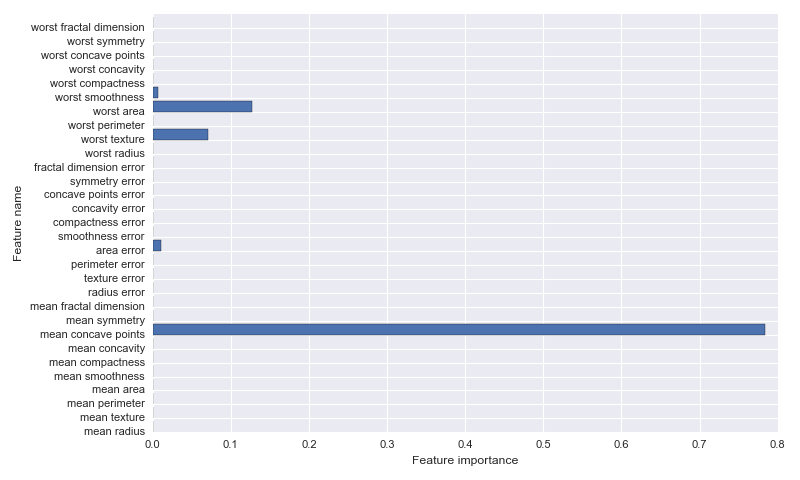

In [91]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

In [92]:
from IPython.core.display import Image, display
display(Image('http://i.imgur.com/qx17a4k.png'))
# slide 122 in week 2 PDF

<IPython.core.display.Image object>

#### Decision Trees: DecisionTreeClassifierKey Parameters
* max_depth: controls maximum depth (number of split points). Most common way to reduce tree complexity and overfitting.
* min_samples_leaf: threshold for the minimum # of data instances a leaf can have to avoid further splitting.
* max_leaf_nodes: limits total number of leaves in the tree.
* In practice, adjusting only one of these (e.g. max_depth) is enough to reduce overfitting.

#### Evaluation
* It's very important to choose evaluation methods that match the goal of your application.
* Compute your selected evaluation metric for multiple different models.
* Then select the model with 'best' value of evaluation metric.

In [93]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [94]:
len(X)

1797

In [95]:
len(y)

1797

The above ouput is an example is for balanced data.

#### Accuracy with imbalanced classes
* An imbalanced class is one in which one class is dominant over the other.
        ex: Recomending a product to the user from the from millions of product in online shopping portals.
* Suppose you have two classes:
        –Relevant (R): the positive class
        –Not_Relevant(N): the negative class
* Out of 1000 randomly selected items, on average One item is relevant and is labelled 'R' and the rest of the items (999 of them) are not relevant and labelled N.
* On building a classifier to predict relevant items, it is seen that its accuracy on a test set is 99.9%.

#### Creating an imbalanced dataset from the balanced dataset

In [96]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [97]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182], dtype=int32)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.90888888888888886

#### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.
* Suppose we had a "dummy" classifier that didn't look at the features at all, and always just blindly predicted the most frequent class (i.e. the negative N class).The also it's accurqacy will be 99.9%.
* Dummy classifiers completely ignore the input data!
* Dummy classifiers serve as a sanity check on your classifier's performance
* They provide a null metric(e.g. null accuracy) baseline.
* Dummy classifiers should not be used for real problems.
* Some commonly-used settings for the strategyparameter for DummyClassifier in scikit-learn:
        --> most_frequent: predicts the most frequent label in the training set.
        --> stratified: random predictions based on training set class distribution.
        --> uniform: generates predictions uniformly at random.
        --> constant: always predicts a constant label provided by the user.